This Notebook is created to analyse given Plume data.
-

prop_20160611_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160611_micro_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20150606_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20150609_c_mask_100c_mark_200_cf2_mf1.pkl

slim_prop_20160830_c_mask_100c_mark_200_cf2_mf1.pkl


prop_20150627_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160518_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160530_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160619_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160625_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160719_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160818_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160819_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160830_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170509_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170605_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170627_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170704_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170716_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170719_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170721_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20180522_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20180606_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20180705_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20180709_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20180710_c_mask_100c_mark_200_cf2_mf1.pkl

In [84]:
import numpy as np
from importlib import reload
import pandas as pd
import slopes_and_binning
from slopes_and_binning import *
reload(slopes_and_binning)
import cloud_and_plumes_slopes
from cloud_and_plumes_slopes import *
reload(cloud_and_plumes_slopes)
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from random import random
import matplotlib
import sys

In [85]:
plumes_data = './data/slim_prop_20160830_c_mask_100c_mark_200_cf2_mf1.pkl'
prop_plumes = pd.read_pickle(plumes_data)

prop_plumes.columns

Index(['x', 'y', 'sq Area', 'time', 'V_h'], dtype='object')

In [86]:
timestep = 19

----------------------------------------------------
Let's have a look at the variation of alpha over time
-
- Timestep needs to be specified above


---------------------------------------------
  number of plumes in this timestep: 3822
---------------------------------------------



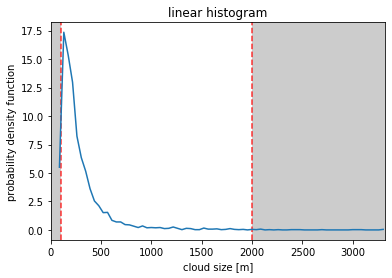

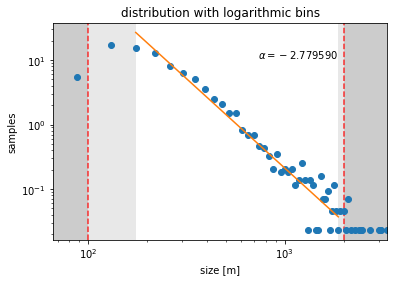

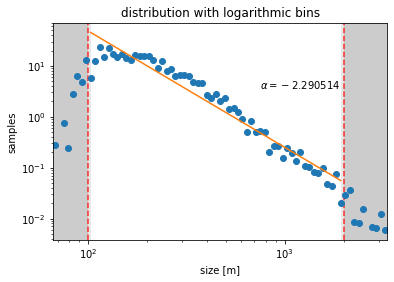

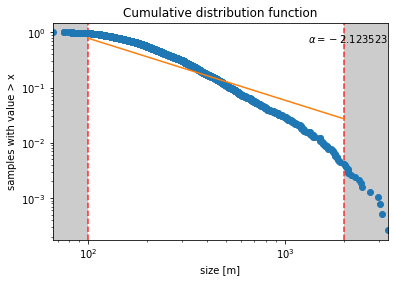

CPU times: user 2.38 s, sys: 455 ms, total: 2.83 s
Wall time: 1.94 s


In [61]:
%%time

n_bins    = 75
size_min  = 1e2
size_max  = 2e3
show_plt  = True


prop_plumes = prop_plumes[['time','sq Area']]
prop_plumes = prop_plumes.loc[prop_plumes['sq Area']<25600]

plume_time  = np.unique(prop_plumes['time'])
plume_area  = prop_plumes['sq Area'].loc[prop_plumes['time']==plume_time[timestep]]

print('\n---------------------------------------------')
print('  number of plumes in this timestep:',len(plume_area))
print('---------------------------------------------\n')

if show_plt:
    CSD, bins = np.histogram(plume_area, bins=n_bins)

    bin_width = (bins[-1]-bins[0])/len(bins)
    bins = bins[1:]/2 + bins[:-1]/2

    plt.axvline(x=size_min, color='red', linewidth=1.5, alpha=0.8, linestyle='--')
    plt.axvline(x=size_max, color='red', linewidth=1.5, alpha=0.8, linestyle='--')

    plt.plot(bins, CSD/bin_width)
    plt.axvspan(0, size_min, color='gray', alpha=0.4, lw=0)
    plt.axvspan(size_max, np.max(plume_area), color='gray', alpha=0.4, lw=0)
    plt.xlabel('cloud size [m]')
    plt.ylabel('probability density function')
    plt.title('linear histogram')
    plt.xlim(0, np.max(plume_area))
    plt.show()

# linear power-law distribution of the data
f_lin, slope_lin, intercept_lin = lin_binning(plume_area, n_bins, size_min, size_max, show_plt)

# logarithmic binning of the data
f_log, slope_log, intercept_log = log_binning(plume_area, n_bins, size_min, size_max, show_plt)

# cumulative distribution by sorting the data
f_cum, slope_cum, intercept_cum = cum_dist(plume_area, size_min, size_max, show_plt)

plot_plume_alpha() uses logarithmic bins and a cumulative distribution function for slope calculation
-

CPU times: user 668 ms, sys: 180 ms, total: 848 ms
Wall time: 435 ms


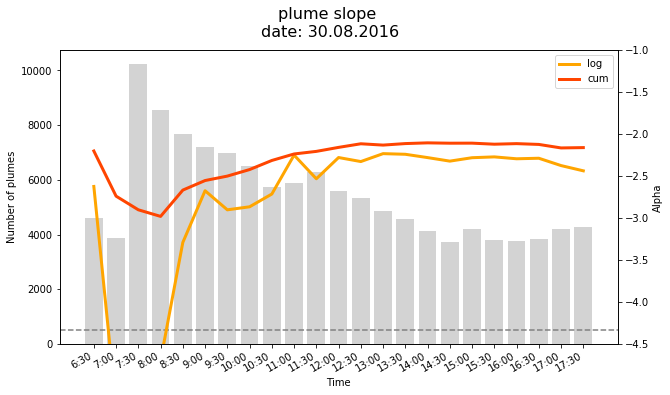

In [76]:
%%time

n_bins      = 75
size_min    = 1e2
size_max    = 7e3
n_plume_min = 500

start_time  = 6.5
increment   = .5

plumes_time_area = prop_plumes[['time','sq Area']]
#del(prop_plumes)
plumes_time_area = plumes_time_area.loc[plumes_time_area['sq Area']<25600]

time, n_plumes, slope_lin, slope_log, slope_com = plot_plume_alpha(plumes_time_area,bin_n,size_min,size_max,n_plume_min,show_plt=False)
time_labels = get_time_labels(start_time, increment, len(time))

plt.figure(figsize=(10,6))
plt.bar(time_labels, n_plumes, color='lightgrey')
plt.xlabel('Time')
plt.ylabel('Number of plumes')
plt.axhline(y=n_plume_min, color='grey', linestyle='--')

plt2 = plt.twinx()

plt2.set_ylabel('Alpha')
#plt2.plot(time_labels, slope_lin, linewidth=3, color='gold', label='lin')
plt2.plot(time_labels, slope_log, linewidth=3, color='orange', label='log')
plt2.plot(time_labels, slope_com, linewidth=3, color='orangered', label='cum')
plt.ylim(-4.5,-1)

plt.legend()
plt.suptitle('plume slope \ndate: %s.%s.%s'%(plumes_data[23:25], plumes_data[21:23], plumes_data[17:21]), fontsize=16)
plt.gcf().autofmt_xdate()
#plt.savefig('log_com_slopes_plumes_20160830.pdf',bbox_inches='tight')

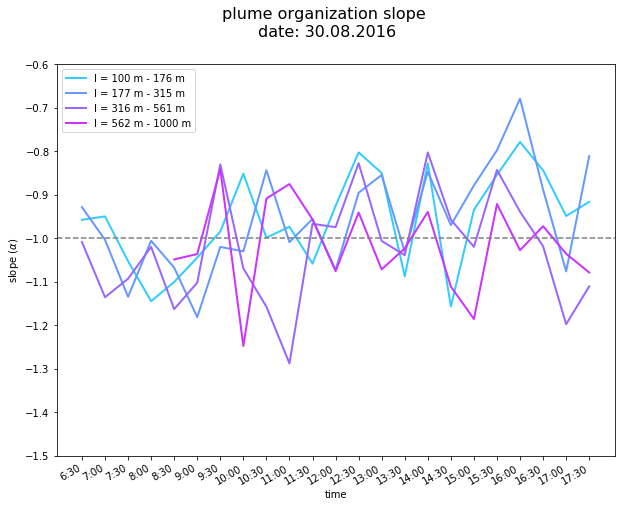

CPU times: user 9.47 s, sys: 116 ms, total: 9.58 s
Wall time: 9.37 s


In [90]:
%%time


subdomains       = [2,4,8,16,32]  #number of subdomains in both x and y-axis
n_bins           = 4              #number of bins which devide the whole plume size range
log_binning      = True
inbetween_subs   = True

domain_size      = 1024

start_time       = 6.5
increment        = .5

percentile       = False           #if set to False min_size and max_size will be used as boundaries for the size distribution
lower_percentile = 5
upper_percentile = 95
size_min         = 100
size_max         = 1001.5


prop_plumes = prop_plumes[['time','sq Area','x','y']]
prop_plumes = prop_plumes.loc[prop_plumes['sq Area']<25600]

plume_time  = np.unique(prop_plumes['time'])
time_vector = range(len(plume_time))        #time can be either the whole timespan or specific timesteps (time = [0,1,8,9])

center_x = []
center_y = []
size = []
for timestep in range(len(plume_time)):
    center_x.append(prop_plumes['x'].loc[prop_plumes['time']==plume_time[timestep]])
    center_y.append(prop_plumes['y'].loc[prop_plumes['time']==plume_time[timestep]])
    size.append(prop_plumes['sq Area'].loc[prop_plumes['time']==plume_time[timestep]])

if percentile:
    min_size = np.percentile((prop_plumes['sq Area']), lower_percentile)
    print(lower_percentile,'th percentile -> ',np.round(min_size,1),'m')
    max_size = np.percentile((prop_plumes['sq Area']), upper_percentile)
    print(upper_percentile,'th percentile -> ',np.round(max_size,1),'m')
    
f = variability(center_x, center_y, size, time_vector, start_time, increment, domain_size, subdomains, n_bins, size_min, size_max, log_binning=True, inbetween_subs=True, show_subs=False)
plt.suptitle('plume organization slope \ndate: %s.%s.%s'%(plumes_data[23:25], plumes_data[21:23], plumes_data[17:21]), fontsize=16)
#plt.savefig('organization_plumes_20160830.pdf',bbox_inches='tight')
plt.show()

In [125]:
#xxx = np.asarray(xxx)
thetime = np.unique(prop_plumes['time'])
thetime[12]

numpy.datetime64('2020-01-01T12:30:00.000000000')

In [6]:
prop_plumes[['time']]

,time
0,2020-01-01 06:30:00
1,2020-01-01 06:30:00
2,2020-01-01 06:30:00
3,2020-01-01 06:30:00
4,2020-01-01 06:30:00
...,...
125891,2020-01-01 17:30:00
125892,2020-01-01 17:30:00
125893,2020-01-01 17:30:00
125894,2020-01-01 17:30:00


In [71]:
plumes_data[17:21]
plumes_data[21:23]
plumes_data[23:25]

'30'